In [66]:
import pandas as pd
import seaborn as sns

In [67]:
data = pd.read_csv('merc.csv')

In [68]:
data.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,SLK,2005,5200,Automatic,63000,Petrol,325,32.1,1.8
1,S Class,2017,34948,Automatic,27000,Hybrid,20,61.4,2.1
2,SL CLASS,2016,49948,Automatic,6200,Petrol,555,28.0,5.5
3,G Class,2016,61948,Automatic,16000,Petrol,325,30.4,4.0
4,G Class,2016,73948,Automatic,4000,Petrol,325,30.1,4.0


# Побудувати стовпчикові діаграми, на яких відобразити
### а) кількість мерседесів кожної моделі;
### б) медіанну ціну мерседесів кожної моделі;
### в) середню ціну мерседесів кожної моделі з розподілом за типом коробки передач.

<AxesSubplot: xlabel='count', ylabel='model'>

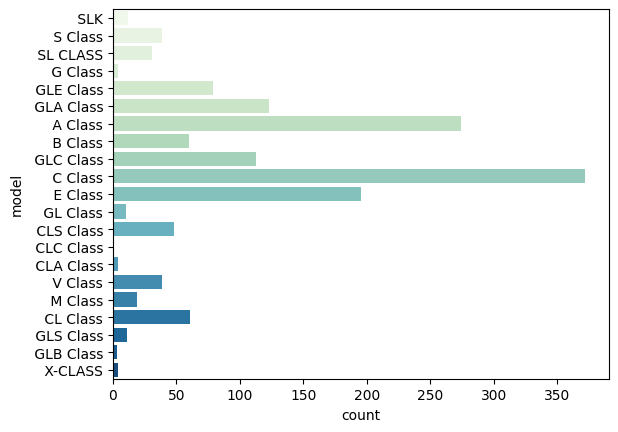

In [69]:
sns.countplot(data=data, y='model',palette="GnBu")

<AxesSubplot: ylabel='model'>

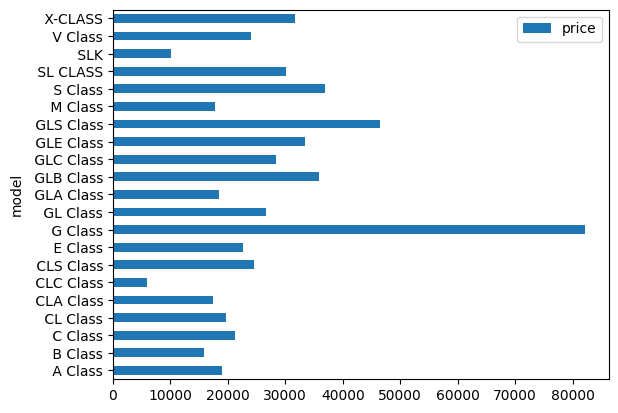

In [70]:
data.groupby('model').agg({'price':'mean'}).plot.barh()

<AxesSubplot: xlabel='model'>

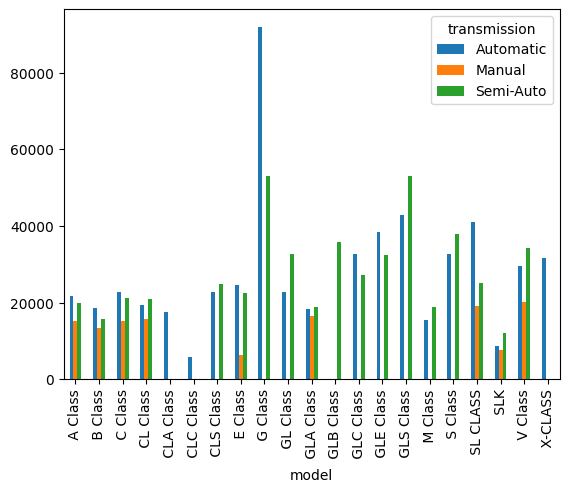

In [71]:
test = data.groupby(['model', 'transmission']).agg({'price':'mean'}).reset_index()
s = pd.pivot_table(test, values='price', index='model', columns='transmission')
s.plot(kind='bar')


# Побудувати гістограму розподілу ціни, загальну і для кожного виду коробки передач.

<AxesSubplot: xlabel='price', ylabel='Count'>

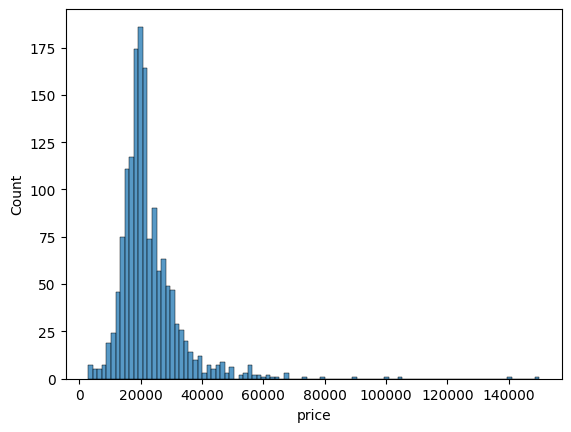

In [72]:
sns.histplot(data=data['price'])

<AxesSubplot: xlabel='price', ylabel='Count'>

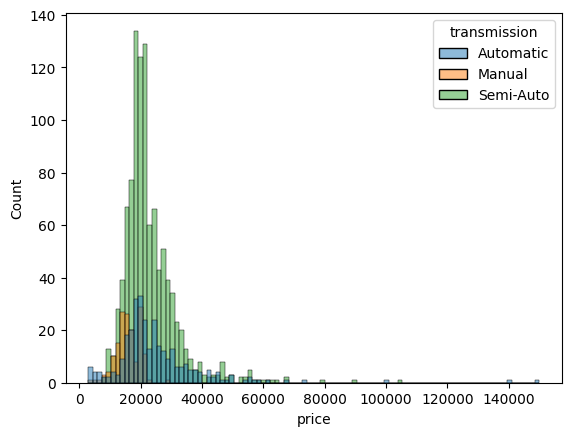

In [73]:
sns.histplot(data=data, x='price', hue='transmission')

# Побудувати діаграму розмаху витрат палива (загальну і в залежності від типу палива), визначити чи присутні викиди.

<AxesSubplot: ylabel='mpg'>

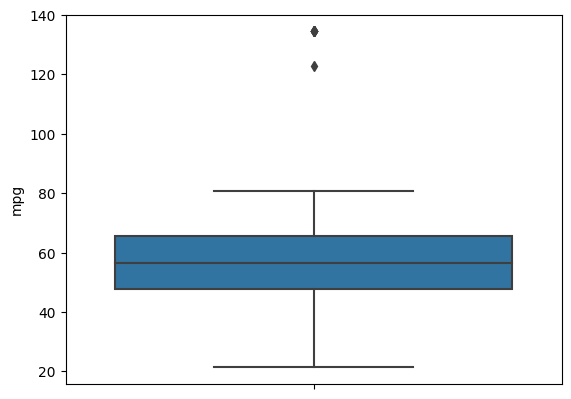

In [74]:
sns.boxplot(data=data, y='mpg')

<AxesSubplot: xlabel='fuelType', ylabel='mpg'>

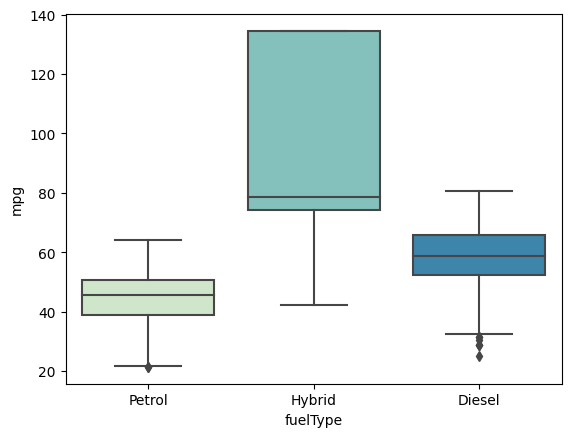

In [75]:
sns.boxplot(x='fuelType', y='mpg', data=data, palette="GnBu")

# За допомогою діаграм розсіювання зробити висновки щодо залежності між
### а) ціною та пробігом;
### б) витратами на паливо та об’ємом двигуна.

### Порахувати коефіцієнт кореляції за допомогою відповідних функцій.

-0.4977335053489445

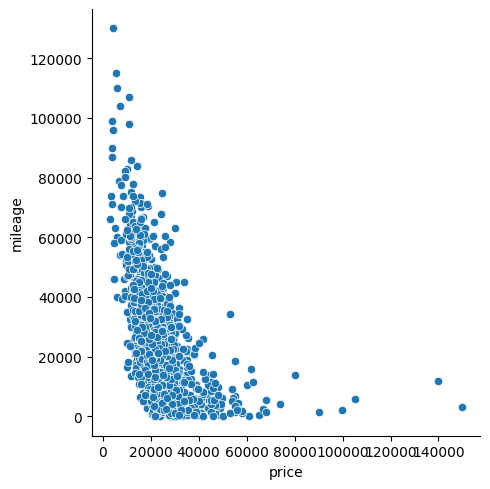

In [76]:
sns.relplot(data=data, x='price', y='mileage')
data['price'].corr(data['mileage'])

-0.39294153983785235

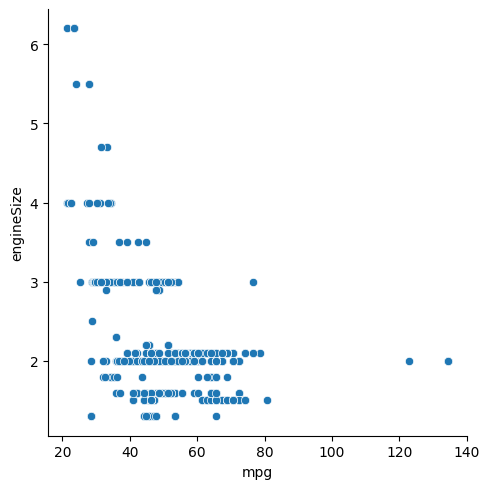

In [77]:
sns.relplot(data=data, x='mpg', y='engineSize')
data['mpg'].corr(data['engineSize'])
